In [2539]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2540]:
diabetes_DS = pd.read_csv('data/diabetes.csv')

In [2541]:
diabetes_DS.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2542]:
diabetes_DS.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2543]:
diabetes_DS.shape

(768, 9)

In [2544]:
diabetes_DS['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 - Non-Diabetic \
1 - Diabetic

In [2545]:
df = diabetes_DS.groupby('Outcome').mean().T

In [2546]:
df

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


This formula calculates the percentage difference between values in columns labeled 0 and 1 in the DataFrame 'df'. The result is then stored in a new column labeled '%diff'. This formula is commonly used to measure the relative difference between two values.

In [2547]:
df['%diff'] = (abs(df[0] - df[1] )/ ((df[0] + df[1])/2)) *100

In [2548]:
df

Outcome,0,1,%diff
Pregnancies,3.298000,4.865672,38.406044
Glucose,109.980000,141.257463,24.898725
BloodPressure,68.184000,70.824627,3.799227
SkinThickness,19.664000,22.164179,11.954520
Insulin,68.792000,100.335821,37.301753
BMI,30.304200,35.142537,14.785572
DiabetesPedigreeFunction,0.429734,0.550500,24.640239
Age,31.190000,37.067164,17.220651


In [2549]:
data = diabetes_DS.drop(columns= 'Outcome', axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [2550]:
import seaborn as sns
import matplotlib.pyplot as plt

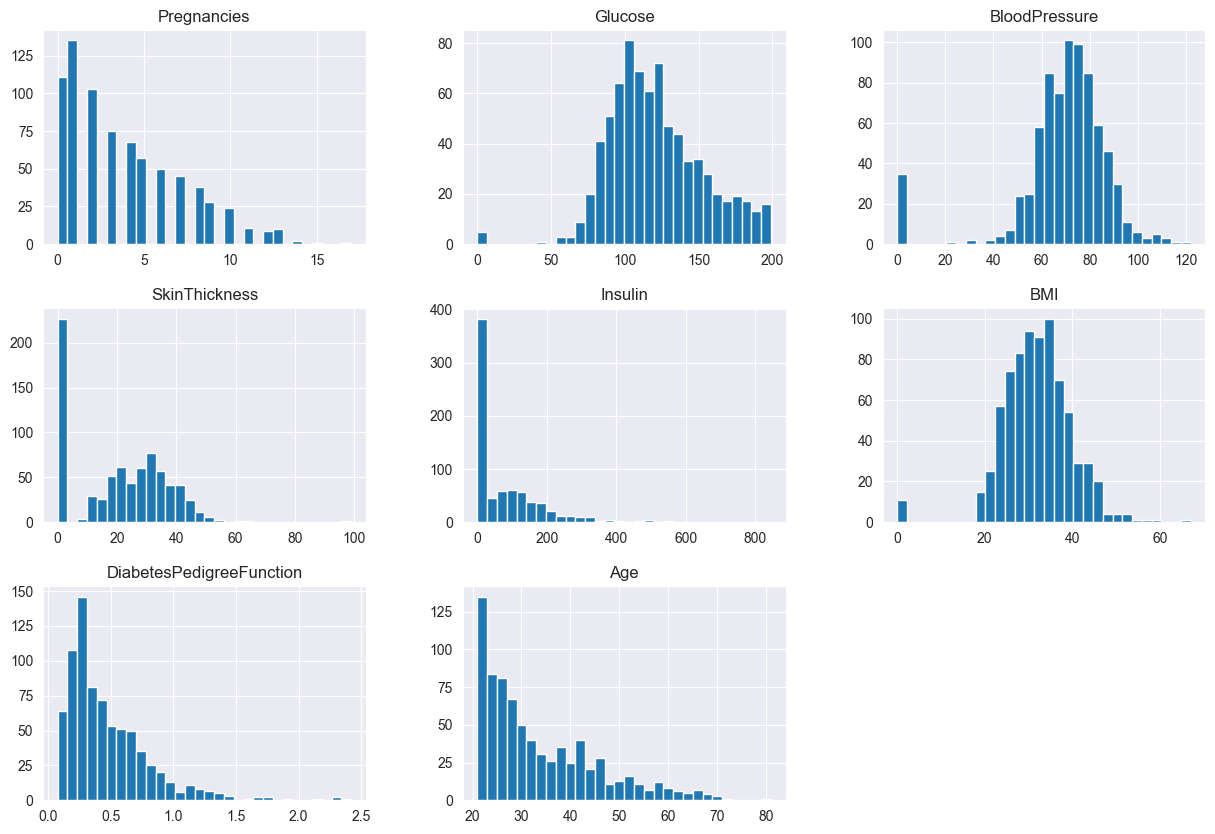

In [2551]:
data.hist(bins=30, figsize=(15,10))
plt.show()

In [2552]:
from pandas.plotting import scatter_matrix

<Axes: >

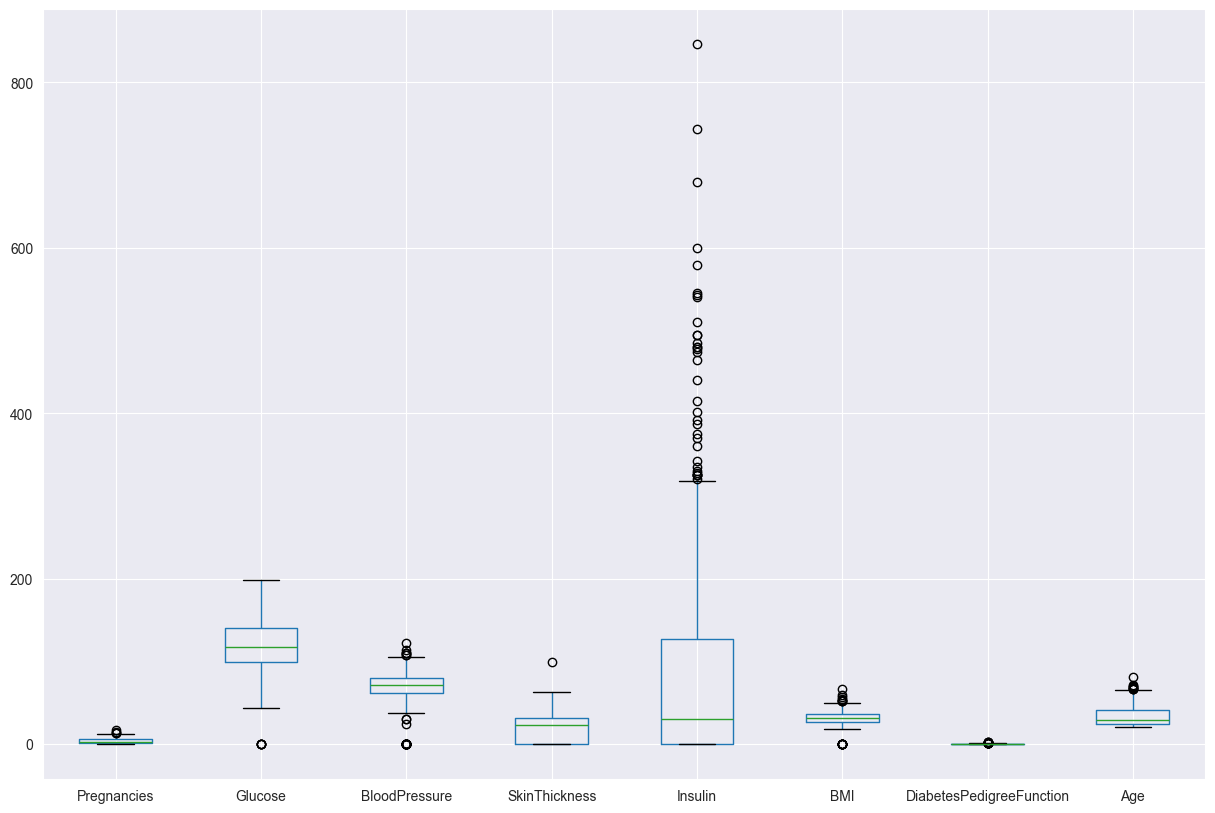

In [2553]:
data.boxplot(figsize=(15,10))

In [2554]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

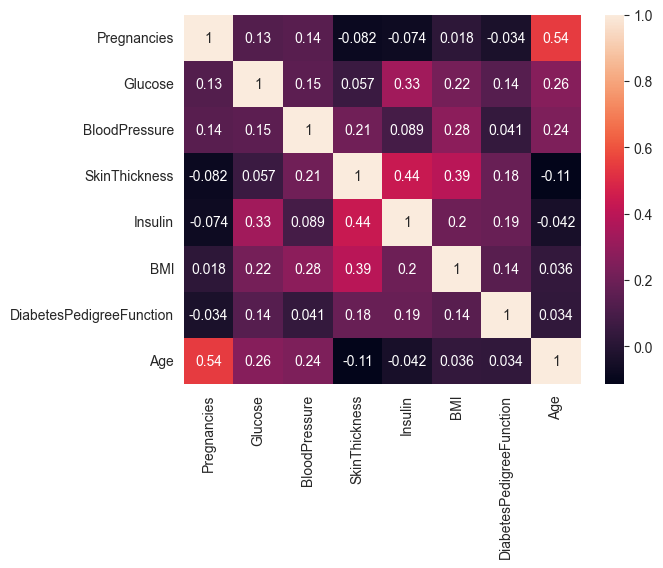

In [2555]:
sns.heatmap(corr_matrix, annot= True)

handling missing or zero values in a dataset

In [2556]:
# Calculate the median value for BMI
median_bmi = diabetes_DS['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
diabetes_DS['BMI'] = diabetes_DS['BMI'].replace(
    to_replace=0, value=median_bmi)

median_bloodp = diabetes_DS['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
diabetes_DS['BloodPressure'] = diabetes_DS['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

# Calculate the median value for PlGlcConc
median_plglcconc = diabetes_DS['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
diabetes_DS['Glucose'] = diabetes_DS['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

# Calculate the median value for SkinThick
median_skinthick = diabetes_DS['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
diabetes_DS['SkinThickness'] = diabetes_DS['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

# Calculate the median value for SkinThick
median_skinthick = diabetes_DS['Insulin'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
diabetes_DS['Insulin'] = diabetes_DS['Insulin'].replace(
    to_replace=0, value=median_skinthick)

Use Z-scores to identify and filter out the outliers.

In [2557]:
from scipy import stats
# Define a threshold for the Z-score
z_threshold = 3
# Calculate the Z-scores for each column
z_scores = stats.zscore(diabetes_DS)

# Create a boolean mask for outliers
outlier_mask = (abs(z_scores) < z_threshold).all(axis=1)

# Filter the dataset to remove outliers
diabetes_DS2 = diabetes_DS[outlier_mask]

# Print information about the removed outliers
outliers_removed = diabetes_DS.shape[0] - diabetes_DS2.shape[0]
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 49


<Axes: >

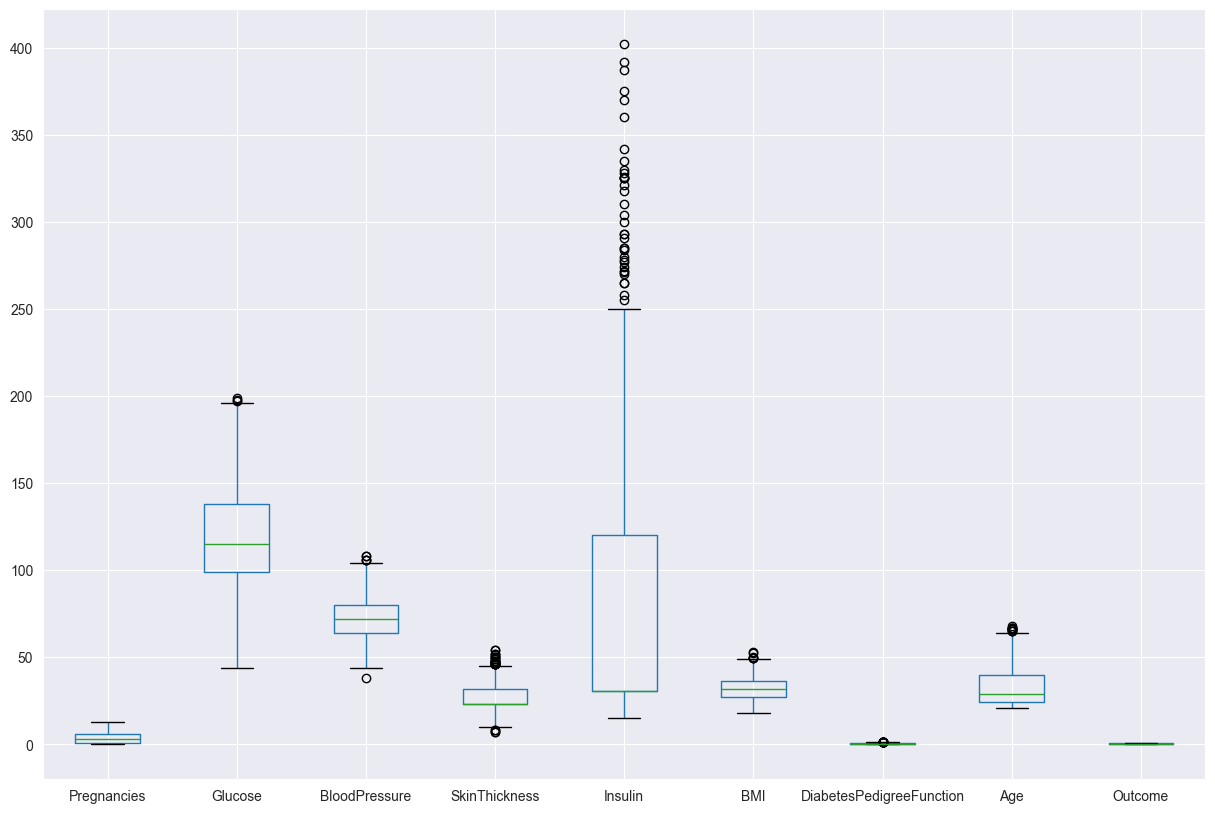

In [2558]:
diabetes_DS2.boxplot(figsize=(15,10))


In [2559]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(diabetes_DS2.drop(columns= 'Outcome', axis=1))
Y = diabetes_DS2['Outcome']

In [2560]:
X[0:5]

array([[ 0.65875016,  0.94471568, -0.02395982,  0.95054337, -0.6834586 ,
         0.22664342,  0.62910294,  1.51108259],
       [-0.8671563 , -1.18205666, -0.5540247 ,  0.24837828, -0.6834586 ,
        -0.8552006 , -0.34756579, -0.17007217],
       [ 1.26911274,  2.12625587, -0.730713  , -0.4537868 , -0.6834586 ,
        -1.36521278,  0.78834241, -0.08159034],
       [-0.8671563 , -1.04702349, -0.5540247 , -0.4537868 ,  0.13950544,
        -0.62337688, -0.99867828, -1.05489046],
       [ 0.35356887, -0.13554963,  0.15272848, -0.4537868 , -0.6834586 ,
        -1.00974975, -0.87836401, -0.258554  ]])

In [2561]:
Y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [2562]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)

In [2563]:
print(X.shape, X_train.shape, X_test.shape)

(719, 8) (575, 8) (144, 8)


In [2564]:
from sklearn.linear_model import LogisticRegression

In [2565]:
logisticregression = LogisticRegression(solver='lbfgs', max_iter=200)

In [2566]:
logisticregression.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [2567]:
round(logisticregression.score(X_train, Y_train)*100, 2)

78.78

In [2568]:
round(logisticregression.score(X_test, Y_test)*100, 2)

79.86

In [2569]:
from sklearn.metrics import classification_report

In [2570]:
Y_pred = logisticregression.predict(X_test)
Y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [2571]:
Y_test

674    0
283    1
368    0
661    1
359    1
      ..
447    0
449    0
739    1
2      1
364    0
Name: Outcome, Length: 144, dtype: int64

In [2572]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[84, 12],
       [17, 31]], dtype=int64)

In [2573]:
print(Y_pred)

[0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0]


In [2574]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        96
           1       0.72      0.65      0.68        48

    accuracy                           0.80       144
   macro avg       0.78      0.76      0.77       144
weighted avg       0.79      0.80      0.80       144



In [2575]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)


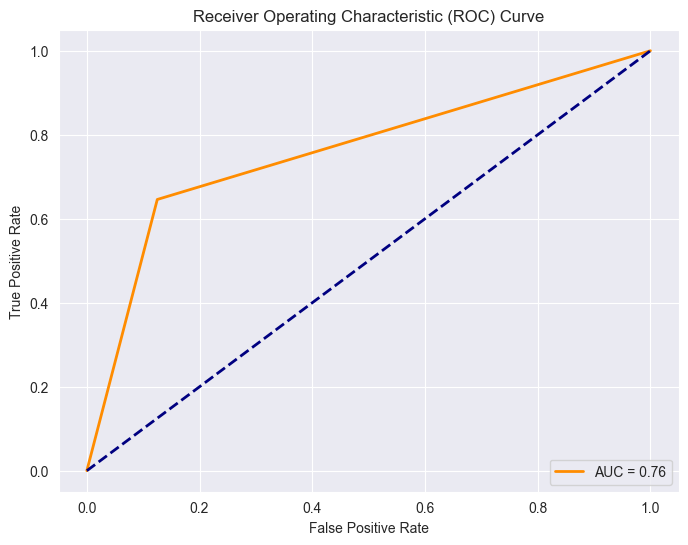

In [2576]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [2577]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2578]:
cross_val_score(logisticregression, X , Y , cv=StratifiedKFold(n_splits=5))

array([0.77083333, 0.76388889, 0.78472222, 0.82638889, 0.77622378])

In [2579]:
cross_val_score(logisticregression, X , Y , cv=StratifiedKFold(n_splits=5)).mean()

0.784411421911422

# MLP model with tensorflow

In [2580]:
X_train_scaled =  X_train
X_test_scaled =  X_test


In [2581]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [2582]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='MSE',
              metrics=['accuracy' , tf.keras.metrics.AUC()])

# Print the model summary
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 32)                288       
                                                                 
 dense_187 (Dense)           (None, 16)                528       
                                                                 
 dense_188 (Dense)           (None, 8)                 136       
                                                                 
 dense_189 (Dense)           (None, 1)                 9         
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2583]:
history = model.fit(X_train_scaled, Y_train, epochs=50 , batch_size=10, validation_split=0.2)

Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.2210 - accuracy: 0.6609 - auc_47: 0.6270 - val_loss: 0.2036 - val_accuracy: 0.6696 - val_auc_47: 0.7088
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.1921 - accuracy: 0.6957 - auc_47: 0.7820 - val_loss: 0.1885 - val_accuracy: 0.6696 - val_auc_47: 0.7637
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.7391 - auc_47: 0.8150 - val_loss: 0.1791 - val_accuracy: 0.6957 - val_auc_47: 0.7847
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.7739 - auc_47: 0.8301 - val_loss: 0.1737 - val_accuracy: 0.7217 - val_auc_47: 0.7955
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.7935 - auc_47: 0.8406 - val_loss: 0.1693 - val_accuracy: 0.7130 - val_auc_47: 0.8081
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.1512 - accuracy: 0.8087 - auc_47: 0.

In [2584]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, Y_test)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test AUC: {test_auc:.4f}')

5/5 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy: 0.7986 - auc_47: 0.8700

Test Accuracy: 79.86%
Test AUC: 0.8700


In [2585]:
 # Predict probabilities on the test set
y_pred  = model.predict(X_test_scaled)
y_pred = np.where(y_pred >= 0.5, 1, 0)

5/5 [==============================] - 0s 876us/step


In [2586]:
#logistic regression
confusion_matrix(Y_test, Y_pred)

array([[84, 12],
       [17, 31]], dtype=int64)

In [2587]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, Y_pred)

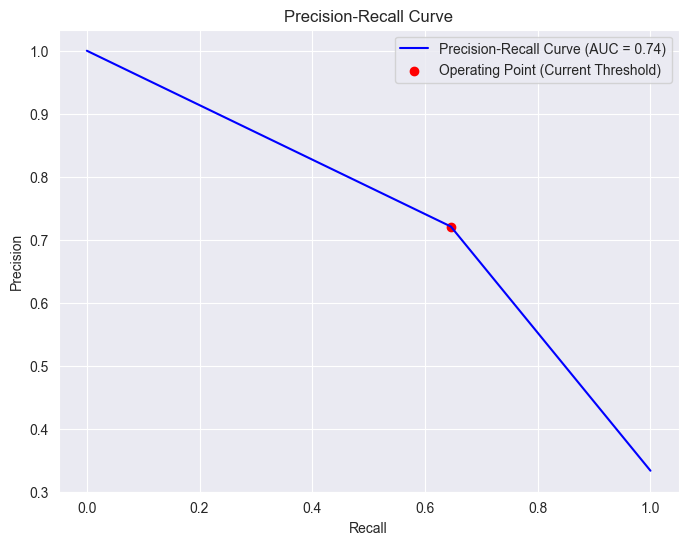

In [2588]:
# Plot precision-recall curve
area_under_curve = auc(recall_curve, precision_curve)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})', color='b')
plt.scatter(recall, precision, color='r', marker='o', label='Operating Point (Current Threshold)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [2589]:
confusion_matrix(Y_test, y_pred)

array([[85, 11],
       [18, 30]], dtype=int64)

In [2590]:


# Calculate precision and recall
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

# Calculate precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, y_pred)


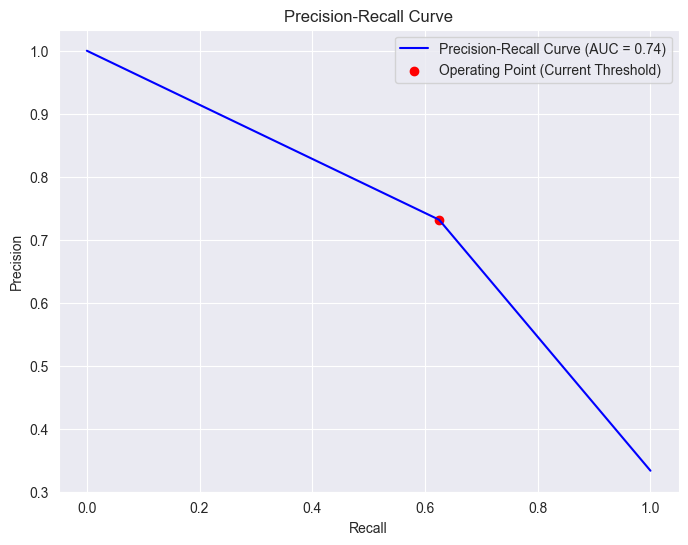

In [2591]:
# Plot precision-recall curve
area_under_curve = auc(recall_curve, precision_curve)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})', color='b')
plt.scatter(recall, precision, color='r', marker='o', label='Operating Point (Current Threshold)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

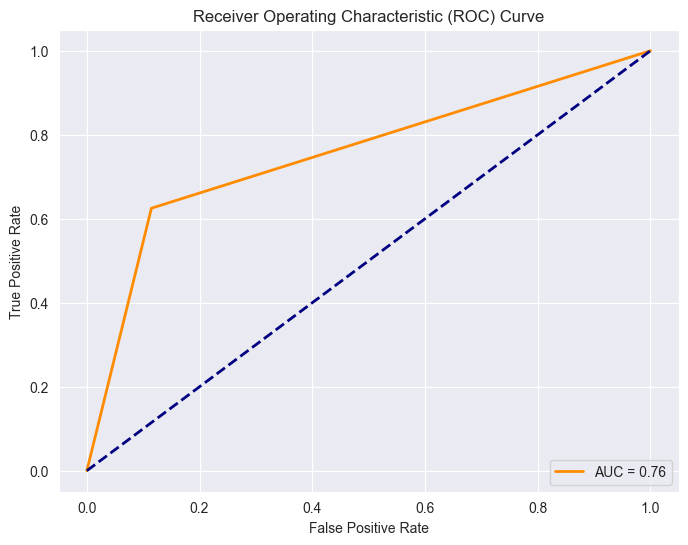

In [2592]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
#roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

